In [1330]:
import shared_methods as shared_methods
import importlib
importlib.reload(shared_methods)
from shared_methods import Config

from IPython.display import Markdown

In [1331]:
'''
config = Config({'expiration': '31MAR23',
        'strikes' : [
            5000, 8000, 10000, 
            11000, 12000, 13000, 14000, 15000, 16000, 17000, 18000, 19000, 20000, 
            21000, 22000, 23000, 24000, 25000, 26000, 27000, 28000, 29000, 30000, 
            32000, 34000, 35000, 36000, 38000, 40000, 42000, 45000, 50000, 55000, 
            60000, 65000, 70000, 75000, 80000, 90000, 100000, 
            110000, 120000, 130000, 140000, 150000, 
            160000, 170000, 180000, 190000, 200000]
         })

'''

"\nconfig = Config({'expiration': '31MAR23',\n        'strikes' : [\n            5000, 8000, 10000, \n            11000, 12000, 13000, 14000, 15000, 16000, 17000, 18000, 19000, 20000, \n            21000, 22000, 23000, 24000, 25000, 26000, 27000, 28000, 29000, 30000, \n            32000, 34000, 35000, 36000, 38000, 40000, 42000, 45000, 50000, 55000, \n            60000, 65000, 70000, 75000, 80000, 90000, 100000, \n            110000, 120000, 130000, 140000, 150000, \n            160000, 170000, 180000, 190000, 200000]\n         })\n\n"

In [1332]:

config = Config({'expiration': '31MAR23',
        'strikes' : [
            10000, 15000, 20000, 
            25000, 28000, 30000
        ]
         })

In [1333]:
'''
config = Config({'expiration': '31MAR23',
        'strikes' : [
            10000, 20000, 25000,
            40000, 50000, 60000, 70000, 
            100000, 150000, 200000]
         })
'''

"\nconfig = Config({'expiration': '31MAR23',\n        'strikes' : [\n            10000, 20000, 25000,\n            40000, 50000, 60000, 70000, \n            100000, 150000, 200000]\n         })\n"

In [1334]:
display(Markdown(f'## Expiration: **{config.expiration}**'))

## Expiration: **31MAR23**

In [1335]:
display(Markdown(f'### Strikes {config.strikes}'))

### Strikes [10000, 15000, 20000, 25000, 28000, 30000]

In [1336]:
merged_df = shared_methods.getMergedDataframe(config)

startDate = merged_df.iloc[-1]['timestamp'].strftime('%Y-%m-%d')
startPrice = merged_df.iloc[-1]['btc_usd']

endDate = merged_df.iloc[0]['timestamp'].strftime('%Y-%m-%d')
endPrice = merged_df.iloc[0]['btc_usd']


"These strikes don't have any data:"

[]

In [1337]:
display(Markdown(f'## Start price at {startDate}: **{startPrice}**'))

## Start price at 2022-05-01: **38488.34**

In [1338]:
display(Markdown(f'## End price at {endDate}: **{endPrice}**'))

## End price at 2023-03-31: **28476.0**

In [1339]:
def filter(df):
    #pd.set_option('display.width', 1000)
    with pd.option_context('display.max_rows', None, 'display.max_columns', None):
        strike = 5000
        month = 1
        year = 2023
        result = df.loc[(pd.to_datetime(df['timestamp']).dt.month == month) 
                        & (pd.to_datetime(df['timestamp']).dt.year == year)

                       ]
        result = result.dropna(axis=1, how='all')
#        result = result.loc[:, ['timestamp', 'btc_usd', f'option_{strike}_usd']]

        display(result)

In [1340]:

#with pd.option_context('display.max_rows', None, 'display.max_columns', None):
#    display(merged_df)
#    display(merged_df.loc[:, ['timestamp', 'btc_usd', f'option_5000_usd']].dropna(axis=1, how='all'))
#filter(merged_df)
#display(merged_df)

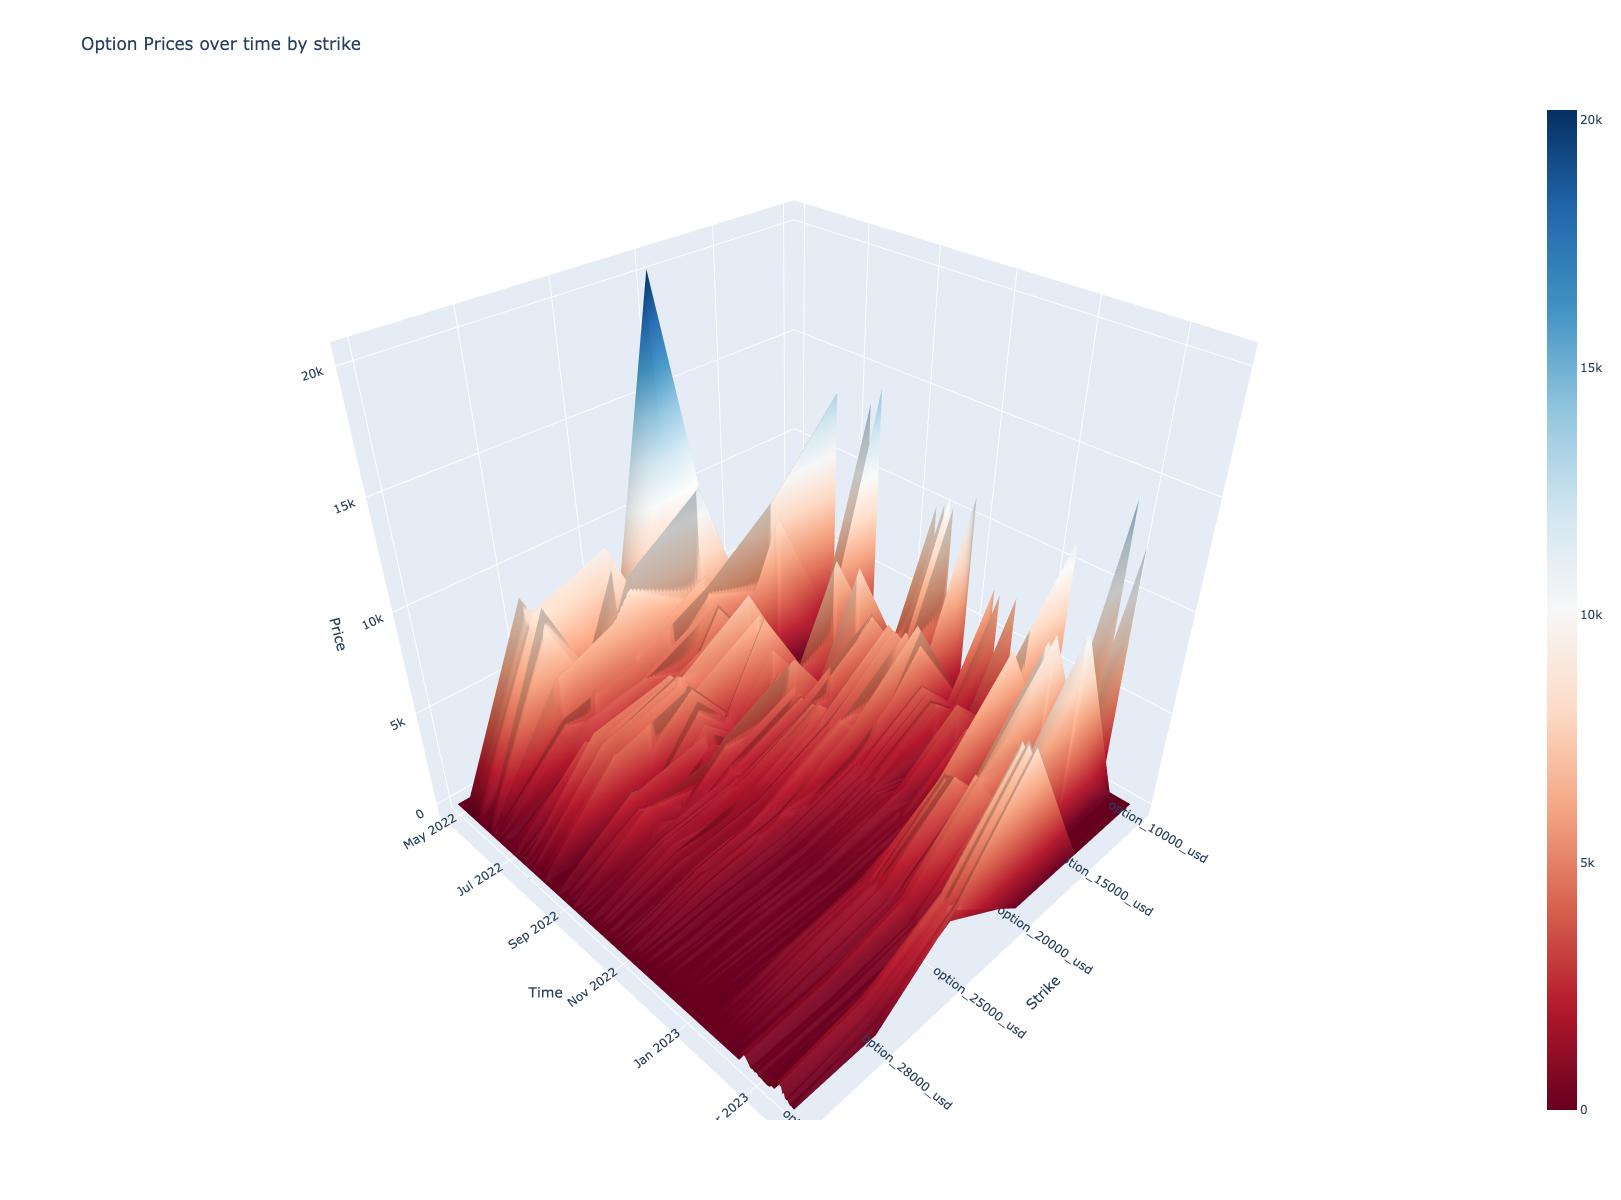

In [1341]:


shared_methods.plotSurface(merged_df)

* At the beginning only the out of the money options have been traded.


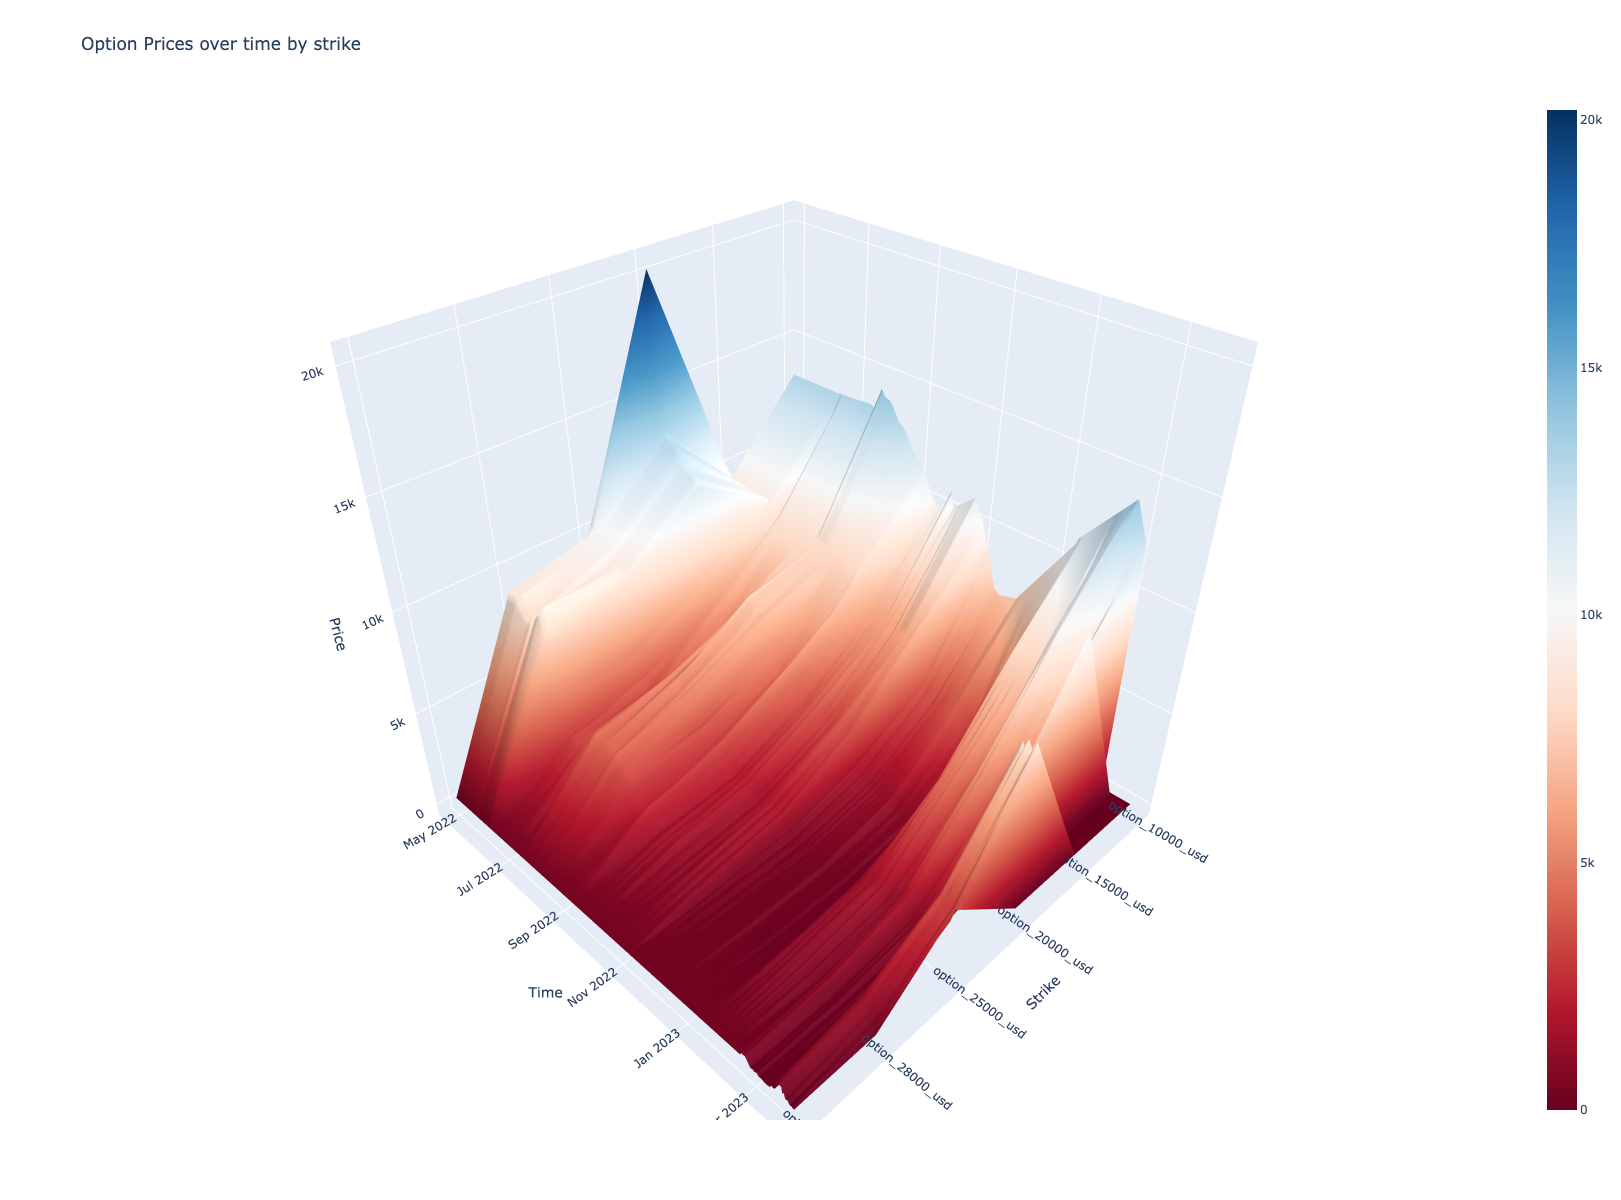

In [1342]:
shared_methods.plotSurface(merged_df.interpolate(method='linear')) #cubic vs linear

* Obviously options with a lower strike have more intrinsic value and thus are more pricy.
* As the BTC price declines the option prices decline.
* Soon before expiration the atm options increase the most in fixed dollar terms (not percentage wise)
* Soon before expiration the out of the money options go to zero.
* The options that are way in the money don't move much.

### Show the Plain prices of BTC and the Options

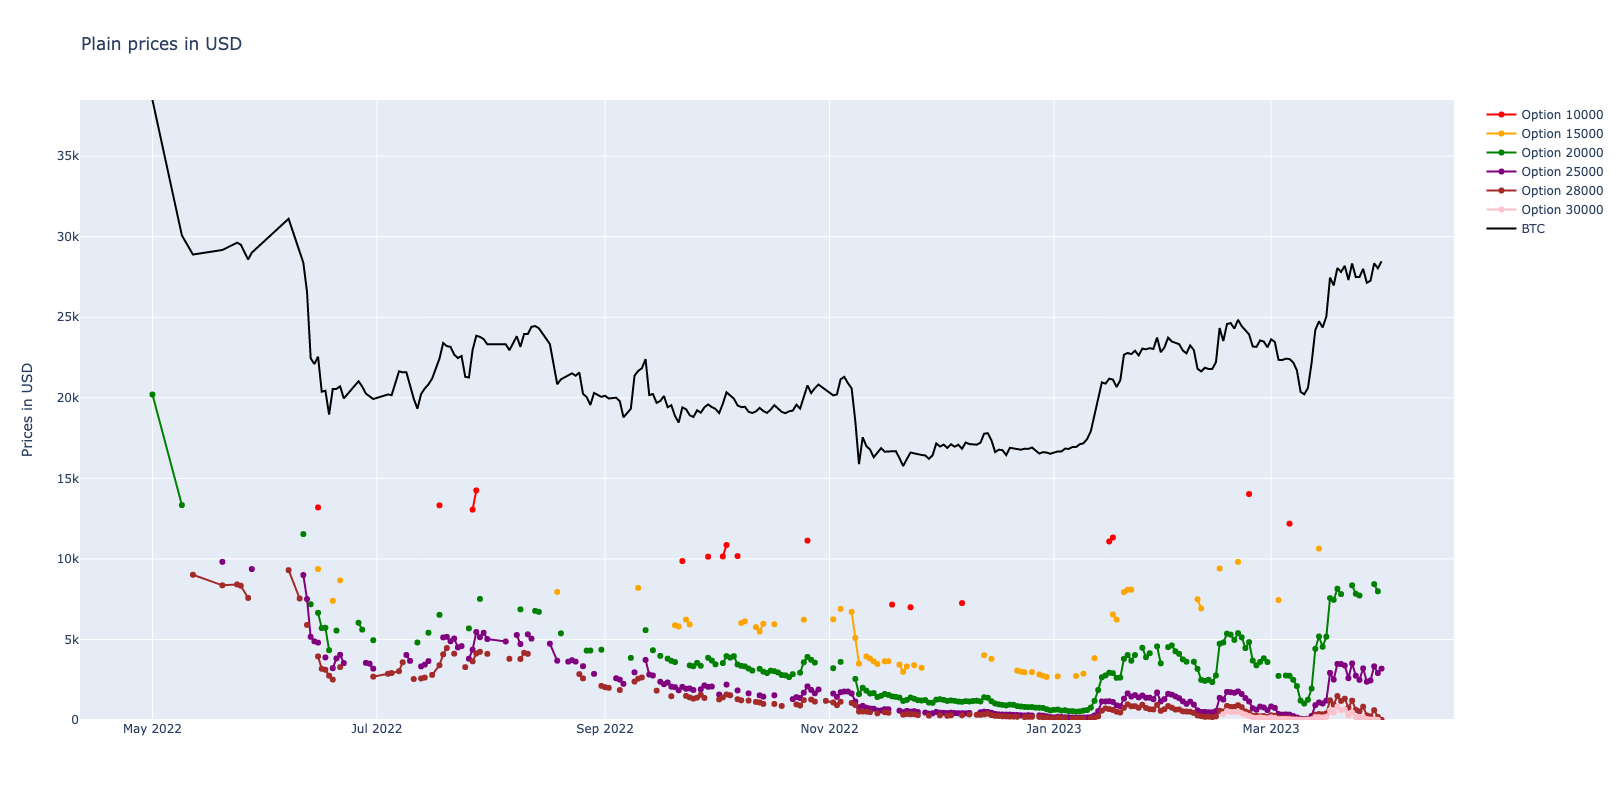

In [1343]:

shared_methods.showPlainPriceChart(merged_df, config.strikes)

In [1344]:
shared_methods.getTradingViewWidget("Bitstamp:BTCUSD")


### Move the lines up to the same startpoint of BTC to roughly visualize the delta

In [1345]:

df_shifted = shared_methods.shiftLinesToTheStartOfBTC(merged_df, config.strikes)
#with pd.option_context('display.max_rows', None, 'display.max_columns', None):
#    display(df_shifted)

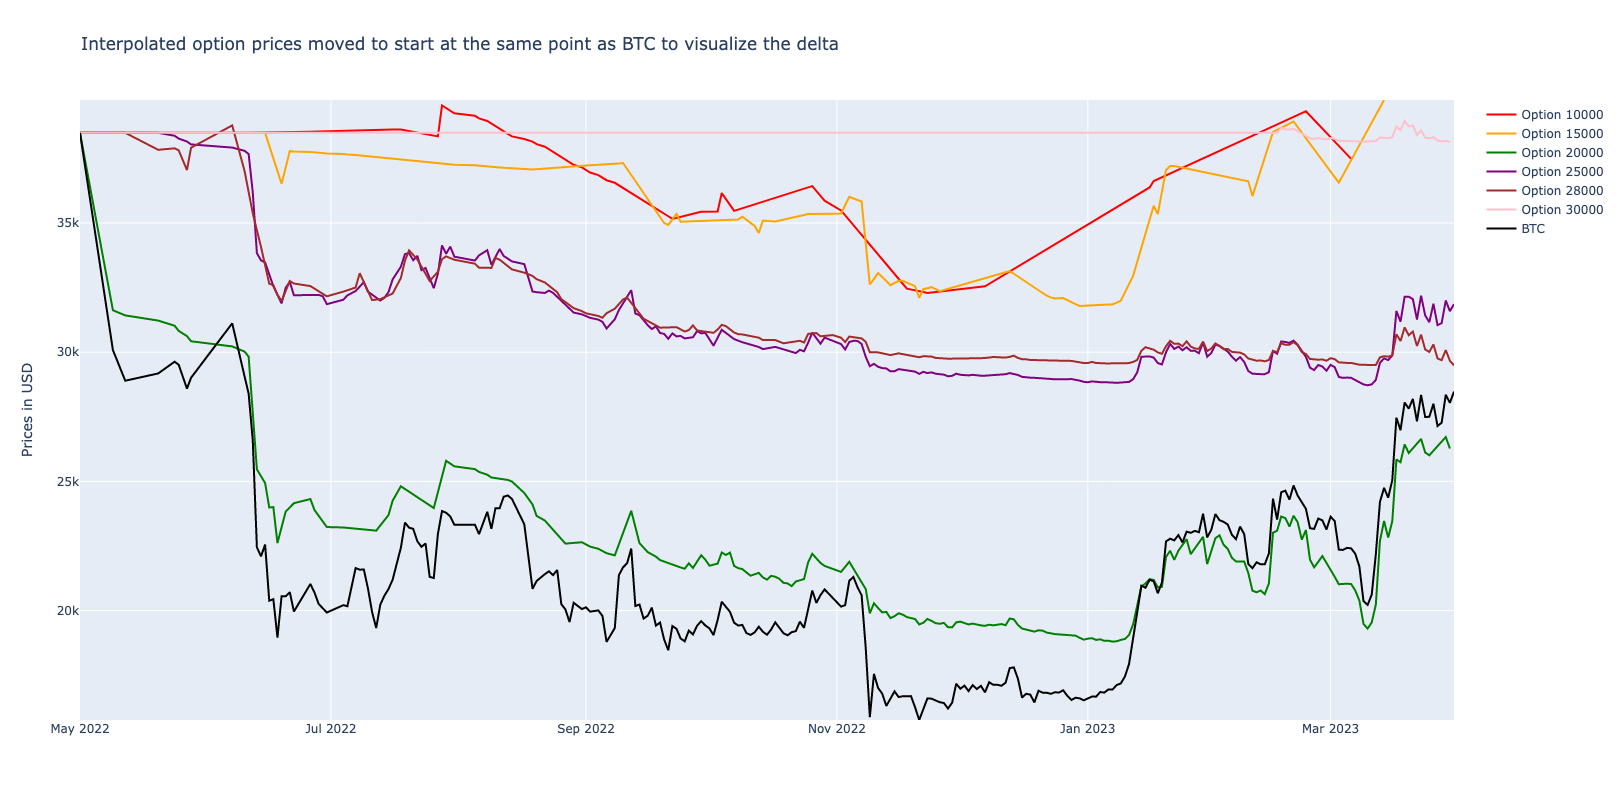

In [1346]:
shared_methods.showOffsettedPriceChart(df_shifted, config.strikes)

The more the option is in the money the more it follows the price movements of BTC (=higher delta). But it's interpolated which distorts the picture as there aren't always trades while the line doesn't really show that.

In [1347]:
dfPricesChangedUSD = shared_methods.getPriceChanges(merged_df, config.strikes)
#with pd.option_context('display.max_rows', None, 'display.max_columns', None):
#    display(dfPricesChangedUSD)

### Absolute changes in USD compared to previous day. The Delta.

Disable the BTC plot in the legend of the chart if it overlays the other plots too much!

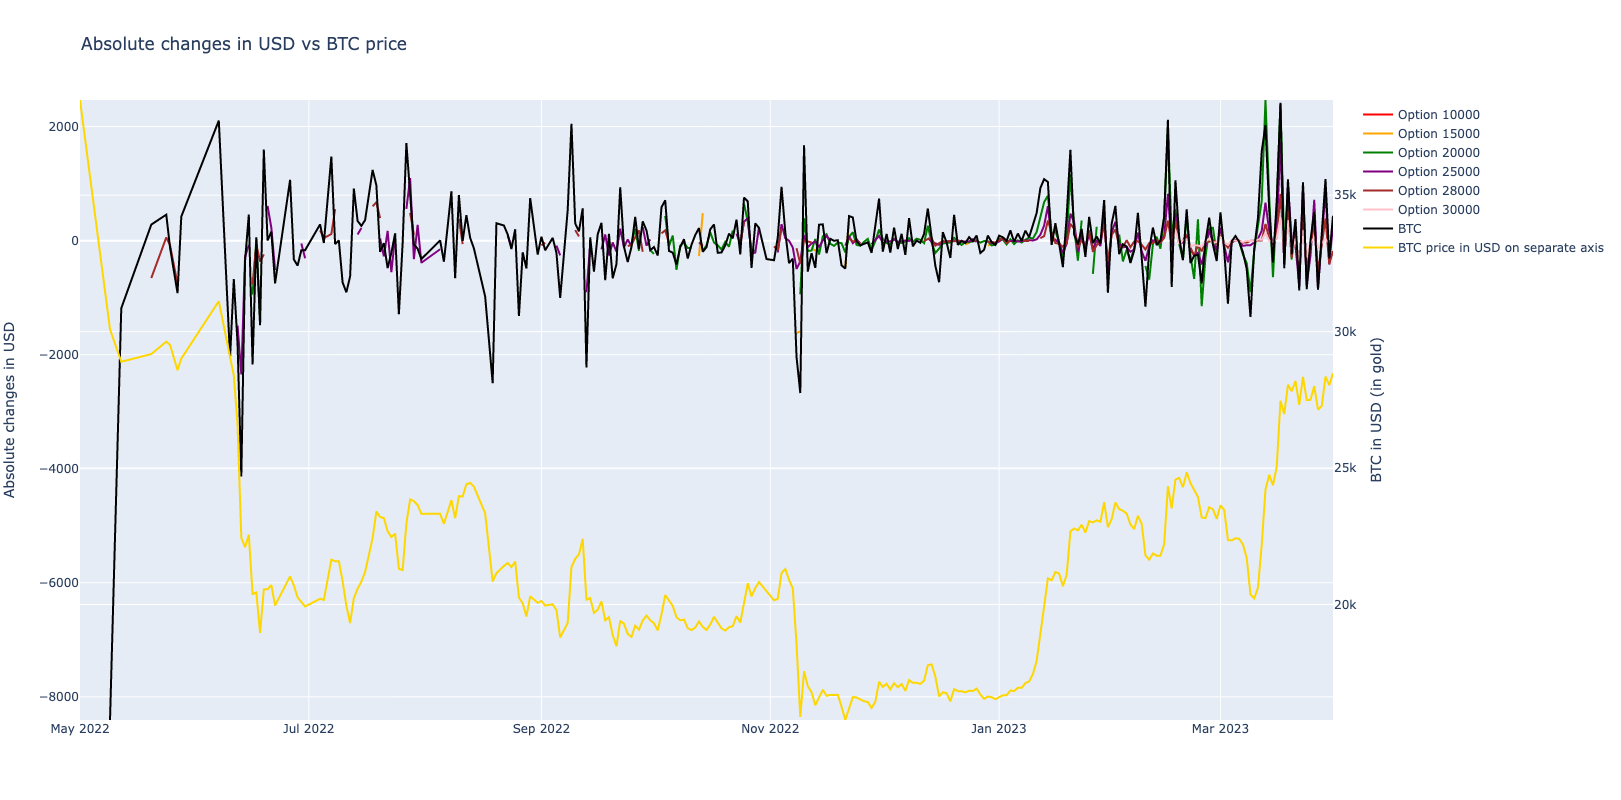

In [1348]:
shared_methods.plotOptionPricesChangedUSD(dfPricesChangedUSD, config.strikes)


### Percent changes compared to previous data point relative to the BTC price

#### The out of the money options fluctuate more than the options that are more in the money.

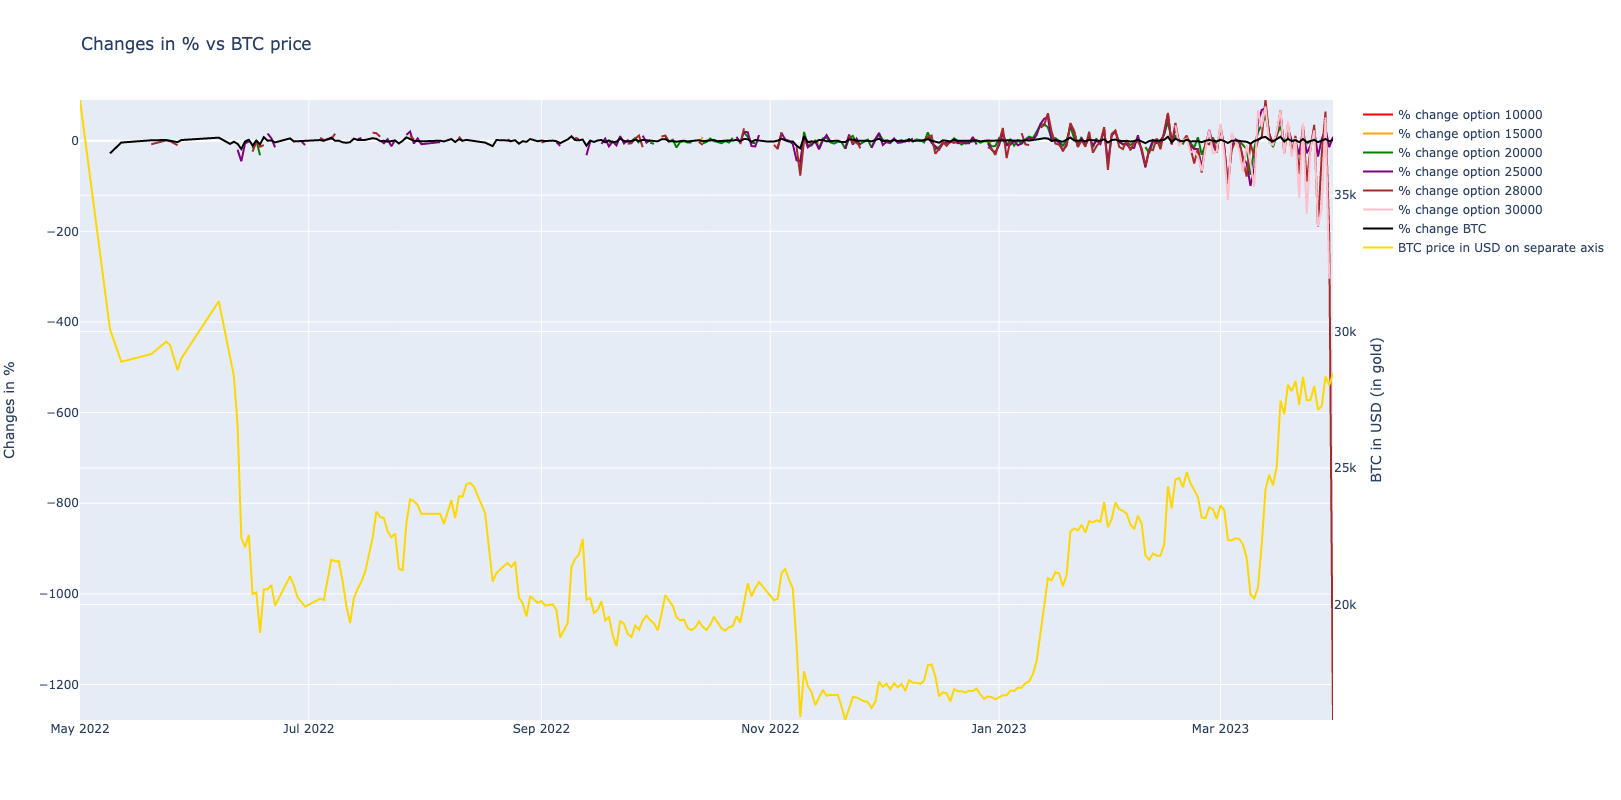

In [1349]:
display(Markdown('#### The out of the money options fluctuate more than the options that are more in the money.'))
shared_methods.plotOptionPricesChangedPercent(dfPricesChangedUSD, config.strikes)

## Price increase in %

In [1350]:

interpolated_df = merged_df.interpolate(method='linear') # or cubic
df_percent_all = shared_methods.calcGains(interpolated_df, config.strikes)

#with pd.option_context('display.max_rows', None):
#    display(df_percent_all)
df_percent_all

,timestamp,btc_usd,btc_percent_all,option_10000_usd,option_10000_percent_all,option_15000_usd,option_15000_percent_all,option_20000_usd,option_20000_percent_all,option_25000_usd,option_25000_percent_all,option_28000_usd,option_28000_percent_all,option_30000_usd,option_30000_percent_all
206,2023-03-31,28476.00,-26.013956,NaN,NaN,NaN,NaN,NaN,NaN,3189.3100,-67.515553,14.24,-99.842052,NaN,NaN
71,2023-03-30,28039.00,-27.149365,NaN,NaN,NaN,NaN,7991.12,-60.452491,2916.0600,-70.298718,196.27,-97.822998,14.02,-96.154479
72,2023-03-29,28353.00,-26.333534,NaN,NaN,NaN,NaN,8435.02,-58.255660,3331.4800,-66.067493,609.59,-93.238505,56.71,-84.445115
207,2023-03-28,27272.00,-29.142177,NaN,NaN,NaN,NaN,8258.07,-59.131373,2454.4800,-75.000102,218.18,-97.579975,27.27,-92.520160
208,2023-03-27,27142.00,-29.479941,NaN,NaN,NaN,NaN,8081.12,-60.007087,2374.9300,-75.810352,284.99,-96.838927,67.86,-81.386801
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
280,2022-05-24,29632.15,-23.010060,13194.83,0.0,9371.71,0.0,12741.22,-36.944569,9706.0925,-1.139417,8415.53,-6.656011,364.58,0.000000
260,2022-05-20,29176.70,-24.193405,13194.83,0.0,9371.71,0.0,12941.27,-35.954535,9817.9600,0.000000,8359.12,-7.281704,364.58,0.000000
281,2022-05-12,28896.19,-24.922223,13194.83,0.0,9371.71,0.0,13141.32,-34.964501,9817.9600,0.000000,9015.61,0.000000,364.58,0.000000
204,2022-05-09,30082.00,-21.841264,13194.83,0.0,9371.71,0.0,13341.37,-33.974467,9817.9600,0.000000,9015.61,0.000000,364.58,0.000000


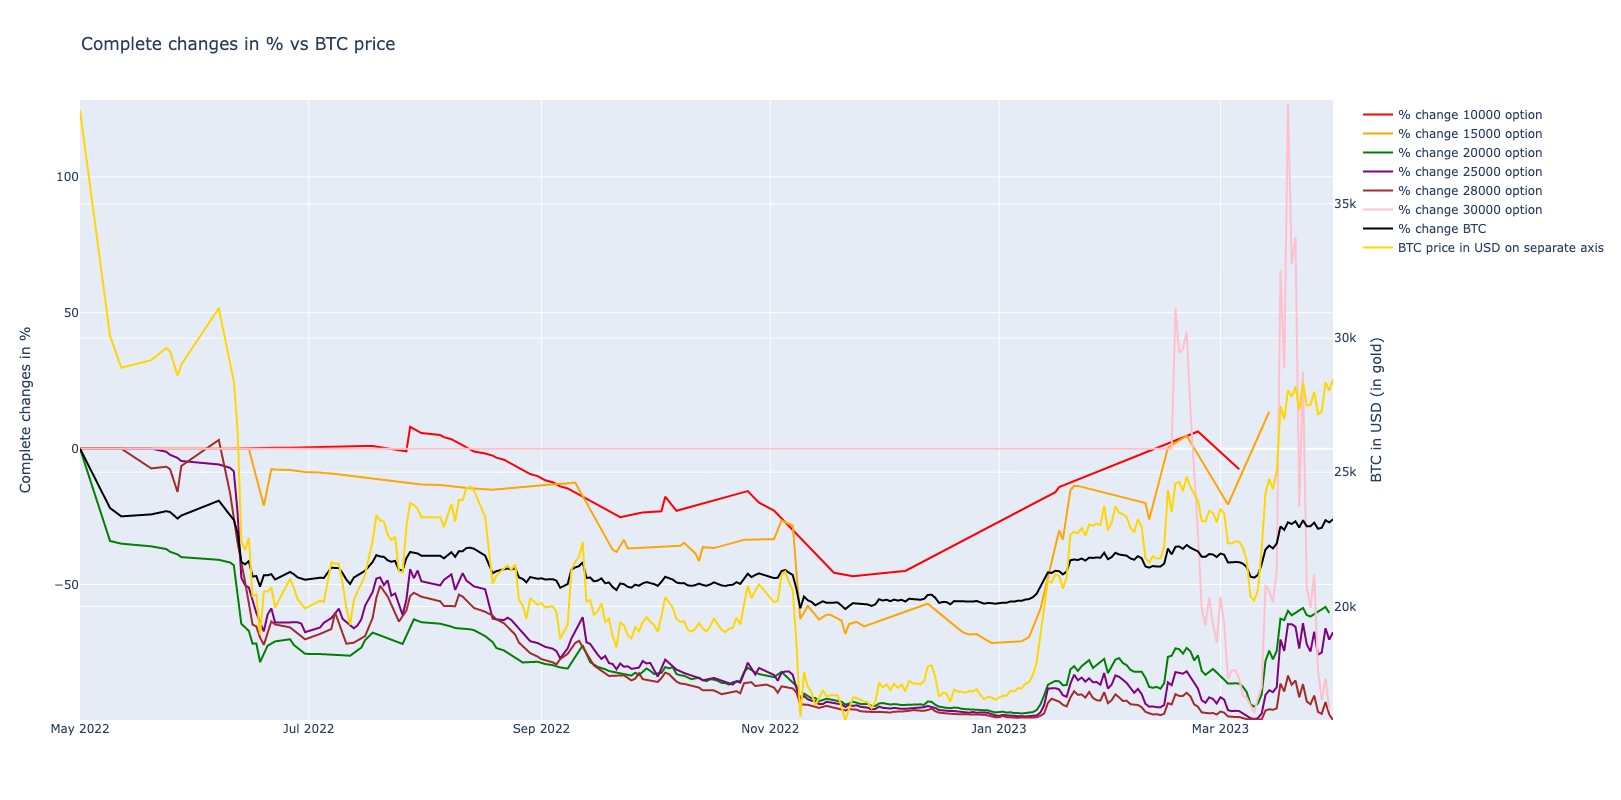

In [1351]:
shared_methods.plotOptionPricesChangedPercentAll(df_percent_all, config.strikes)